# Setup & Import Libraries

In [49]:
import os
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [50]:
os.chdir("/content/drive/MyDrive/deep_learning/spaceship_titanic")
%ls

data/  kaggle.json  notebooks/  reports/  test.npz


# Load Dataset

In [51]:
df = pd.read_csv("data/train.csv")
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


# Exploratory Data Analysis - EDA

In [4]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [6]:
df = df.astype({"CryoSleep": bool, "VIP": bool, "Transported": int})

In [7]:
print(f"Amount of samples: {len(df)}")

Amount of samples: 8693


## Checking if exist missing values

In [8]:
df.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep         0
Cabin           199
Destination     182
Age             179
VIP               0
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [9]:
def plot_nan_values(dataframe):
    plt.figure(figsize=(10,5))
    sns.heatmap(dataframe.isnull(), yticklabels=False, cmap="viridis")
    plt.ylabel("N observations")
    plt.xlabel("Features")
    plt.show()

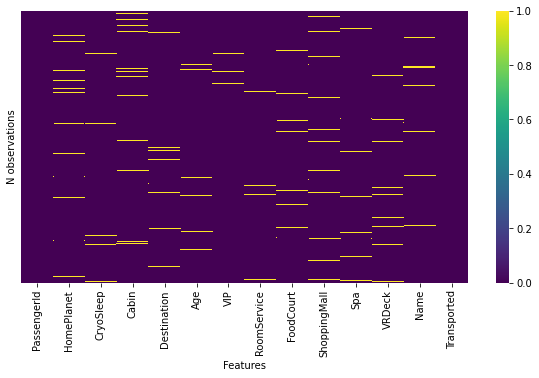

In [25]:
plot_nan_values(df)

### Try the first approach: delete rows with missing values
**Pros:**
* A model trained with the removal of all missing values creates a robust model.

**Cons:**
* Loss of a lot of information;
* Works poorly if the percentage of missing values is execessive comparison to the complete dataset.

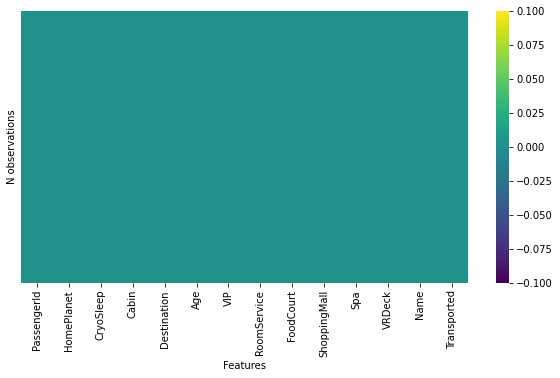

In [26]:
df_non_nan = df.dropna()
plot_nan_values(df_non_nan)

In [27]:
print(f"Amount of samples: {len(df_non_nan)}")

Amount of samples: 6606


### Try the second approach: Input Missing Value with mean
**Pros:**
* Prevent data loss which results in deletion of rows or columns.

**Cons:**
* Works only with numerical continuous variables;
* Can cause data leakage;
* Do not factor the covariance between features.

In [4]:
df.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [8]:
df.dtypes

PassengerId      object
HomePlanet       object
CryoSleep          bool
Cabin            object
Destination      object
Age             float64
VIP                bool
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [10]:
import numpy as np

def apply_mean(dataframe):
    for column in dataframe:
        if (dataframe[column].dtype == "float64"):
            dataframe[column] = dataframe[column].replace(np.NaN, dataframe[column].mean())

    return dataframe

In [11]:
df_non_nan = apply_mean(df)

In [12]:
df_non_nan.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep         0
Cabin           199
Destination     182
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            200
Transported       0
dtype: int64

In [13]:
df_non_nan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8693 non-null   bool   
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8693 non-null   float64
 6   VIP           8693 non-null   bool   
 7   RoomService   8693 non-null   float64
 8   FoodCourt     8693 non-null   float64
 9   ShoppingMall  8693 non-null   float64
 10  Spa           8693 non-null   float64
 11  VRDeck        8693 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   int64  
dtypes: bool(2), float64(6), int64(1), object(5)
memory usage: 832.1+ KB


### Try the third approach: Imputation method for categorical columns
**Pros:**
* Prevent data loss which results in deletion of rows or columns;
* Works weel with a small dataset and is easy to implement;
* Negate the loss of data by adding a unique category.

**Cons:**
* Works only with categorical variables;
* Addition of new features to the model while encoding which may result in poor performance;

In [14]:
df["VIP"].value_counts().to_dict()

{False: 8291, True: 402}

In [15]:
def apply_categorical(dataframe):
    for column in dataframe:
        if (dataframe[column].dtype == "object"):
            dataframe[column] = dataframe[column].fillna("Other")
        elif (dataframe[column].dtype == "bool"):
            # print(df[column])
            values = dataframe[column].to_list()
            # for v in values:
            #     if
            # print(df[column].value_counts())
            result_dic = dataframe[column].value_counts().to_dict()
            # print(result_dic)
            temp = 0
            result = False
            for k in result_dic:
                if (temp < result_dic[k]): result = bool(k)
            for v in range(len(values)):
                if (type(v) != bool):
                    values[v] = k
            dataframe[column] = values


    return dataframe

In [16]:
df_non_nan = apply_categorical(df_non_nan)

In [17]:
df_non_nan.isna().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
dtype: int64

## Look into numerical features (Multivariate Analysis)

In [18]:
df_numerical_features = df_non_nan.select_dtypes(include=["float64", "int"])
# df_numerical_features = df.select_dtypes()

In [19]:
def plot_multivariate_analysis(dataframe, hue="Transported"):
    fig = plt.figure(figsize=(10,5))
    sns.pairplot(dataframe, hue=hue, height=2)
    plt.show()

<Figure size 720x360 with 0 Axes>

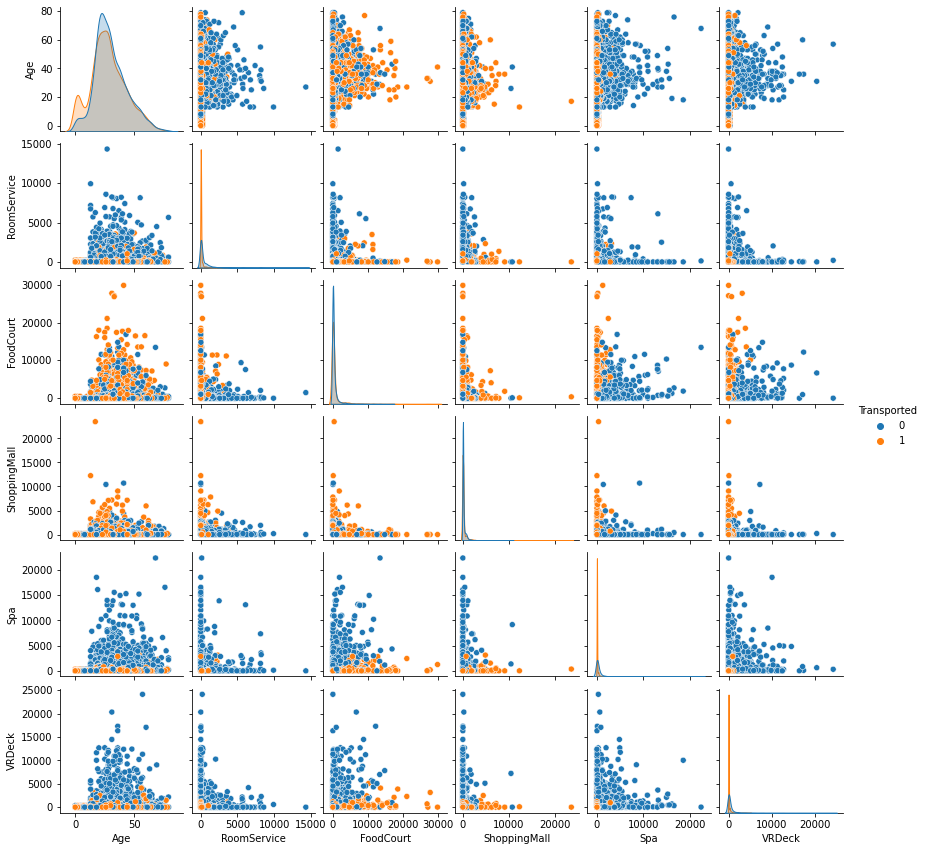

In [20]:
plot_multivariate_analysis(df_numerical_features)

# Preprocessing

In [21]:
# target = df_non_nan.Transported.replace({False: 0, True: 1}) # target
target = df_non_nan.Transported
data = df_non_nan.drop(["Transported"], axis= 1)

In [22]:
target.value_counts()

1    4378
0    4315
Name: Transported, dtype: int64

In [23]:
print(f"Event Rate: {round(target.mean()*100, 2)}%") # in othe word, this case can be a balanced problem

Event Rate: 50.36%


## Split features into numerical and categorical

In [78]:
numerical_features = data.select_dtypes(include="number")
categorical_features = data.select_dtypes(include=["object", "bool"])

In [79]:
numerical_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           8693 non-null   float64
 1   RoomService   8693 non-null   float64
 2   FoodCourt     8693 non-null   float64
 3   ShoppingMall  8693 non-null   float64
 4   Spa           8693 non-null   float64
 5   VRDeck        8693 non-null   float64
dtypes: float64(6)
memory usage: 407.6 KB


In [80]:
categorical_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  8693 non-null   object
 1   HomePlanet   8693 non-null   object
 2   CryoSleep    8693 non-null   bool  
 3   Cabin        8693 non-null   object
 4   Destination  8693 non-null   object
 5   VIP          8693 non-null   bool  
 6   Name         8693 non-null   object
dtypes: bool(2), object(5)
memory usage: 356.7+ KB


## Preprocessing Numerical Features

In [81]:
def unique_levels(x):
    x = x.value_counts().count()
    return x

def detect_low_dist_value(numerical_features):
    df_value_counts = pd.DataFrame(numerical_features.apply(lambda x: unique_levels(x)))
    df_value_counts.columns = ["feature_levels"]
    return df_value_counts

In [82]:
detect_low_dist_value(numerical_features)

,feature_levels
Age,81
RoomService,1274
FoodCourt,1508
ShoppingMall,1116
Spa,1328
VRDeck,1307


### Outlier Analysis Capping and Flooring

In [83]:
numerical_features.describe(percentiles=[0.01, 0.05, 0.10, 0.25, 0.50, 0.75, 0.85,
                                         0.90, 0.99])

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.339054,659.739364,1594.434978,597.417440,1124.675871,1133.259049
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5%,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10%,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,78.000000,118.000000,45.000000,89.000000,71.000000


In [84]:
def outlier_cap(x):
    x = x.clip(lower=x.quantile(0.01))
    x = x.clip(upper=x.quantile(0.99))
    return x

In [85]:
numerical_features = numerical_features.apply(lambda x: outlier_cap(x))
numerical_features.describe(percentiles=[0.01, 0.05, 0.10, 0.25, 0.50, 0.75, 0.85,
                                         0.90, 0.99])

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000
mean,28.773174,207.823690,415.771077,154.906259,275.752863,269.544072
std,14.184672,522.524736,1230.496102,396.497859,814.567699,821.267637
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5%,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10%,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,78.000000,118.000000,45.000000,89.000000,71.000000


In [86]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
# scaler = MinMaxScaler()
numerical_features = scaler.fit_transform(numerical_features)

In [87]:
numerical_features = pd.DataFrame(numerical_features, columns=scaler.get_feature_names_out())

## Preprocessing Categorical Features

In [88]:
categorical_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  8693 non-null   object
 1   HomePlanet   8693 non-null   object
 2   CryoSleep    8693 non-null   bool  
 3   Cabin        8693 non-null   object
 4   Destination  8693 non-null   object
 5   VIP          8693 non-null   bool  
 6   Name         8693 non-null   object
dtypes: bool(2), object(5)
memory usage: 356.7+ KB


### Drop feature don't have any correlation

In [89]:
categorical_features = categorical_features.drop(["PassengerId", "Name", "Cabin"], axis=1)

In [90]:
categorical_features.head()

,HomePlanet,CryoSleep,Destination,VIP
0,Europa,True,TRAPPIST-1e,True
1,Earth,True,TRAPPIST-1e,True
2,Europa,True,TRAPPIST-1e,True
3,Europa,True,TRAPPIST-1e,True
4,Earth,True,TRAPPIST-1e,True


### Dummies the categorical features

In [95]:
# from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.compose import make_column_transformer
# transformer = make_column_transformer(
#     (OneHotEncoder(), ['island', 'sex']),
#     remainder='passthrough')

# transformed = transformer.fit_transform(df)
# transformed_df = pd.DataFrame(transformed, columns=transformer.get_feature_names())
def apply_onehot(dataframe, dataframe_test=None):
    if (dataframe_test is None):
        # for column in dataframe:
        #     # oe = OrdinalEncoder(handle_unknown='use_encoded_value',
        #     #                      unknown_value=-1)
        #     # le = preprocessing.LabelEncoder()
        #     ohe = OneHotEncoder(handle_unknown='ignore')
        #     ohe.fit(dataframe[[column]])
        #     dataframe[column] = ohe.transform(dataframe[[column]])
        dataframe = dataframe[["HomePlanet", 
                            #    "Cabin", 
                               "Destination", "CryoSleep", "VIP"]]
        transformer = make_column_transformer(
            (OneHotEncoder(handle_unknown="ignore"), ["HomePlanet", 
                                                    #   "Cabin", 
                                                      "Destination",
                                                      "CryoSleep", "VIP"]),
            remainder="passthrough"
        )
        transformed = transformer.fit_transform(dataframe)
        transformed_df = pd.DataFrame(transformed, columns=transformer.get_feature_names_out())
        return transformed_df
    else:
        # for col_train, col_test in zip(dataframe, dataframe_test):
        #     # le = preprocessing.LabelEncoder()
        #     # oe = OrdinalEncoder(handle_unknown='use_encoded_value',
        #     #                      unknown_value=-1)
        #     ohe = OneHotEncoder(handle_unknown='ignore')
        #     ohe.fit(dataframe[[col_train]])
        #     dataframe_test[col_test] = ohe.transform(dataframe_test[[col_test]])
        
        dataframe = dataframe[["HomePlanet", 
                            #    "Cabin", 
                            "Destination", "CryoSleep", "VIP"]]
        dataframe_test = dataframe_test[["HomePlanet", 
                                        #  "Cabin", 
                                         "Destination", "CryoSleep", "VIP"]]
        transformer = make_column_transformer(
            (OneHotEncoder(handle_unknown="ignore"), ["HomePlanet", 
                                                    #   "Cabin", 
                                                    "Destination", "CryoSleep", "VIP"]),
            remainder="passthrough"
        )
        transformer.fit(dataframe)
        transformed = transformer.transform(dataframe_test)
        transformed_df = pd.DataFrame(transformed, columns=transformer.get_feature_names_out())
        return transformed_df
        # return dataframe_test


In [94]:
categorical_features = apply_onehot(categorical_features)

categorical_features.head()

,onehotencoder__HomePlanet_Earth,onehotencoder__HomePlanet_Europa,onehotencoder__HomePlanet_Mars,onehotencoder__HomePlanet_Other,onehotencoder__Destination_55 Cancri e,onehotencoder__Destination_Other,onehotencoder__Destination_PSO J318.5-22,onehotencoder__Destination_TRAPPIST-1e,onehotencoder__CryoSleep_True,onehotencoder__VIP_True
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0


In [67]:
# def dummies_cat_features(categorical_features):
#     return pd.get_dummies(categorical_features, drop_first=True)

# categorical_features = dummies_cat_features(categorical_features)
# categorical_features.head()

## Put all together

In [96]:
X = pd.concat([categorical_features, numerical_features], axis=1, join="inner")

print(f"Number of obsevations: {X.shape[0]}, Number of features: {X.shape[1]}")

Number of obsevations: 8693, Number of features: 16


In [97]:
X.head()

,onehotencoder__HomePlanet_Earth,onehotencoder__HomePlanet_Europa,onehotencoder__HomePlanet_Mars,onehotencoder__HomePlanet_Other,onehotencoder__Destination_55 Cancri e,onehotencoder__Destination_Other,onehotencoder__Destination_PSO J318.5-22,onehotencoder__Destination_TRAPPIST-1e,onehotencoder__CryoSleep_True,onehotencoder__VIP_True,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.721019,-0.397753,-0.337908,-0.390709,-0.338546,-0.328224
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,-0.336522,-0.189138,-0.330594,-0.327653,0.335470,-0.274645
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2.060570,-0.315455,2.568404,-0.390709,6.161619,-0.268556
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.298003,-0.397753,0.704820,0.545037,3.748519,-0.093208
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,-0.900543,0.182157,-0.281018,-0.009852,0.355113,-0.325788


# Save for preprocess dataset

In [99]:
import numpy as np

In [100]:
X = X.to_numpy()
y = target.to_numpy()
np.savez("data/train.npz", x=X, y=y)

In [101]:
X.shape

(8693, 16)

# Save test preprocess dataset

In [102]:
df_test = pd.read_csv("data/test.csv")
df_test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [103]:
categorical_features.shape

(8693, 10)

In [104]:
def get_transformed_data(dataframe, dataframe_train):
    dataframe = dataframe.astype({"CryoSleep": bool, "VIP": bool,})
    df_non_nan = apply_mean(dataframe)
    df_non_nan = apply_categorical(df_non_nan)
    dataframe_train = dataframe_train.astype({"CryoSleep": bool, "VIP": bool,})
    dataframe_train = apply_categorical(dataframe_train)

    categorical_features_train = data.select_dtypes(include=["object", "bool"])
    categorical_features_train = categorical_features_train.drop(["PassengerId","Name"], axis=1)
    numerical_features_train = dataframe_train.select_dtypes(include="number")
    numerical_features_test = df_non_nan.select_dtypes(include="number")
    categorical_features_test = df_non_nan.select_dtypes(include=["object", "bool"])
    numerical_features_test = numerical_features_test.apply(lambda x: outlier_cap(x))
    numerical_features_test = scaler.transform(numerical_features)
    numerical_features_test = pd.DataFrame(numerical_features_test, columns=scaler.get_feature_names_out())
    categorical_features_test = categorical_features_test.drop(["PassengerId", "Name"], axis=1)
    categorical_features_test = apply_onehot(dataframe=categorical_features_train, 
                 dataframe_test=categorical_features_test)
    X = pd.concat([categorical_features_test, numerical_features_test], axis=1, join="inner")
    return X

In [105]:
np.savez("data/test.npz", x=get_transformed_data(df_test, df).to_numpy())